Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [2]:
cifar=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[0][0]

6

In [6]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [7]:
x_train=x_train/255.
x_test=x_test/255.

Class Labels

In [8]:
labels={ 0:"airplane",1:"automobile" ,2:"bird" ,
    3:"cat" ,4:"deer" ,5:"dog" ,6:"frog",
    7:"horse",8: "ship", 9:"truck"}

ship


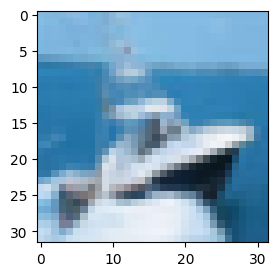

In [9]:
i=8
plt.figure(figsize=(3,3))
print(labels[y_train[i][0]])
plt.imshow(x_train[i])
plt.show()

Sample images

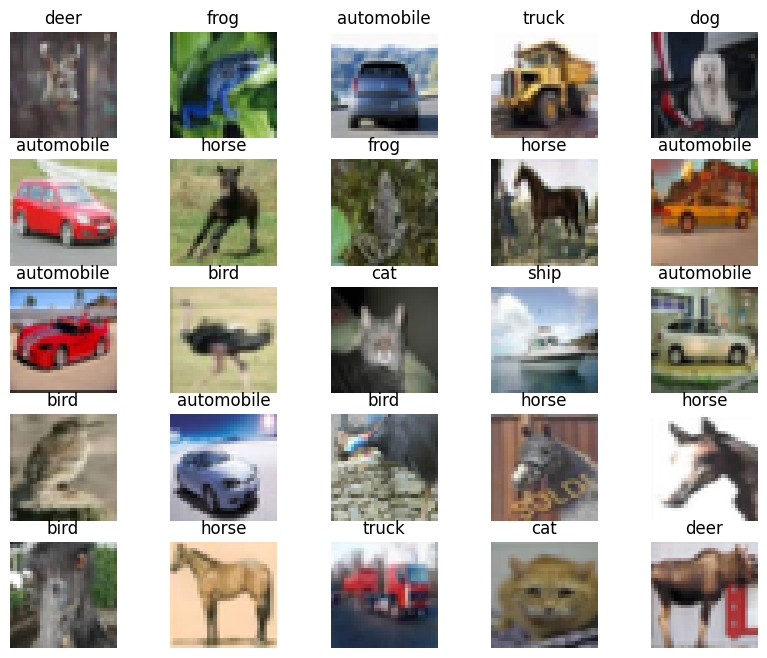

In [10]:
figure=plt.figure(figsize=(10,8))
cols,rows=5,5
for i in range(1,cols*rows+1):
    sample_idx=np.random.randint(len(x_train),size=(1,)).item()
    figure.add_subplot(rows,cols,i)
    img=x_train[sample_idx]
    plt.title(labels[y_train[sample_idx][0]])
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [11]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [12]:
in_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])
in_shape

(32, 32, 3)

Model

In [13]:
cnn=Sequential()

cnn.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=in_shape))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
#cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

In [14]:
cnn.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [15]:
EPOCHS=10
BATCH_SIZE=64

cnn_model = cnn.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1)

Epoch 1/10
782/782 [==============================] - 13s 6ms/step - loss: 1.5762 - accuracy: 0.4286
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2215 - accuracy: 0.5661
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0861 - accuracy: 0.6160
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9942 - accuracy: 0.6489
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9240 - accuracy: 0.6746
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8566 - accuracy: 0.6982
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7984 - accuracy: 0.7194
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7627 - accuracy: 0.7313
Epoch 9/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7152 - accuracy: 0.7489
Epoch 10/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6869 - accuracy: 0.757

In [16]:
#loss = history.history.loss
loss=cnn_model.history['loss']
acc=cnn_model.history['accuracy']

Loss and Accuracy Plots for the model

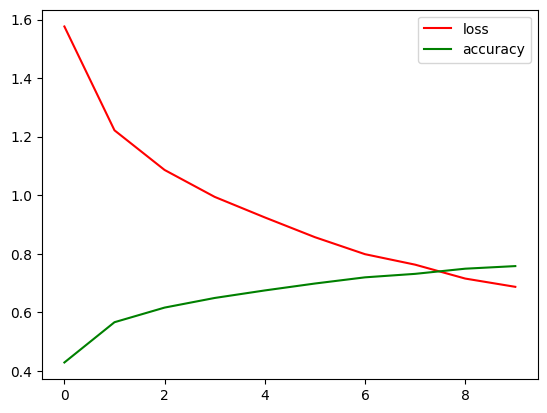

In [17]:
plt.plot(loss,c='red',label="loss")
plt.plot(acc,c='green',label='accuracy')
plt.legend()
plt.show()

In [18]:
score=cnn.evaluate(x_test,y_test)
print("Test loss : ",score[0])
print("Test Accuracy : ",score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8760 - accuracy: 0.7024
Test loss :  0.8760035037994385
Test Accuracy :  0.7024000287055969


Precition Images (ground truth, prediction)

In [19]:
y_pred=cnn.predict(x_test)

In [20]:
y_pred=[np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]

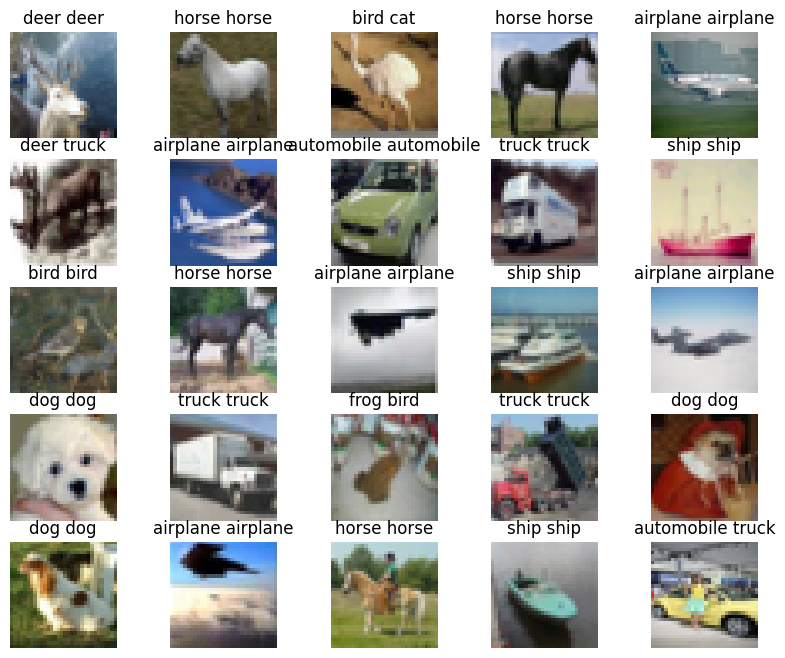

In [21]:
figure=plt.figure(figsize=(10,8))
cols,rows=5,5
for i in range(1,cols*rows+1):
    sample_idx=np.random.randint(len(x_test),size=(1,)).item()
    figure.add_subplot(rows,cols,i)
    img=x_test[sample_idx]
    plt.title(labels[np.argmax(y_test[sample_idx])]+" "+labels[y_pred[sample_idx]])
    plt.axis("off")
    plt.imshow(img)
plt.show()

Hyperparameter tuning

In [22]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
def create_model():
  cnn=Sequential()

  cnn.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=in_shape))
  cnn.add(MaxPooling2D((2,2)))
  cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  cnn.add(MaxPooling2D((2,2)))
  cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  #cnn.add(MaxPooling2D((2,2)))
  cnn.add(Flatten())
  cnn.add(Dense(units=128,activation='relu'))
  cnn.add(Dense(units=10,activation='softmax'))

  cnn.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

  return cnn

In [25]:
model=KerasClassifier(model=create_model)

In [26]:
params={'batch_size':[128,256,512],'epochs':[10]}

In [27]:
grid=GridSearchCV(model,param_grid=params)

In [28]:
grid_result=grid.fit(x_train,y_train)

Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 1.7295 - accuracy: 0.3609
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 1.3514 - accuracy: 0.5141
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 1.2025 - accuracy: 0.5729
Epoch 4/10
313/313 [==============================] - 3s 11ms/step - loss: 1.1086 - accuracy: 0.6065
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 1.0352 - accuracy: 0.6361
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 0.9751 - accuracy: 0.6562
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 0.9307 - accuracy: 0.6723
Epoch 8/10
313/313 [==============================] - 5s 17ms/step - loss: 0.8777 - accuracy: 0.6908
Epoch 9/10
313/313 [==============================] - 4s 14ms/step - loss: 0.8426 - accuracy: 0.7049
Epoch 10/10
79/79 [==============================] - 0s 4ms/step
Epoch 1/10
313/313 [=======

In [29]:
grid_result.best_estimator_

KerasClassifier(
	model=<function create_model at 0x7f982dbea670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [30]:
grid_result.best_params_

{'batch_size': 128, 'epochs': 10}

In [31]:
grid_result.best_score_

0.6748000000000001

Newer, Better Model

In [47]:
cnn=Sequential()

cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=in_shape))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [48]:
EPOCHS=10
BATCH_SIZE=84

cnn_model = cnn.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1)

Epoch 1/10
596/596 [==============================] - 4s 6ms/step - loss: 1.6082 - accuracy: 0.4131
Epoch 2/10
596/596 [==============================] - 3s 5ms/step - loss: 1.2247 - accuracy: 0.5642
Epoch 3/10
596/596 [==============================] - 3s 5ms/step - loss: 1.0615 - accuracy: 0.6241
Epoch 4/10
596/596 [==============================] - 3s 6ms/step - loss: 0.9637 - accuracy: 0.6619
Epoch 5/10
596/596 [==============================] - 3s 5ms/step - loss: 0.8952 - accuracy: 0.6837
Epoch 6/10
596/596 [==============================] - 3s 5ms/step - loss: 0.8264 - accuracy: 0.7099
Epoch 7/10
596/596 [==============================] - 3s 5ms/step - loss: 0.7670 - accuracy: 0.7324
Epoch 8/10
596/596 [==============================] - 3s 5ms/step - loss: 0.7238 - accuracy: 0.7477
Epoch 9/10
596/596 [==============================] - 3s 5ms/step - loss: 0.6831 - accuracy: 0.7622
Epoch 10/10
596/596 [==============================] - 3s 5ms/step - loss: 0.6456 - accuracy: 0.7746

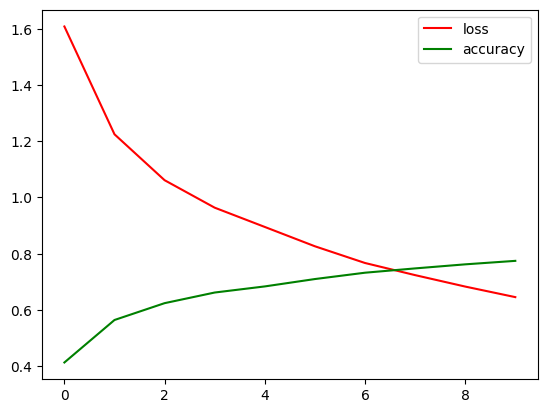

In [49]:
loss=cnn_model.history['loss']
acc=cnn_model.history['accuracy']

plt.plot(loss,c='red',label="loss")
plt.plot(acc,c='green',label='accuracy')
plt.legend()
plt.show()

In [50]:
score=cnn.evaluate(x_test,y_test)
print("Test loss : ",score[0])
print("Test Accuracy : ",score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8312 - accuracy: 0.7198
Test loss :  0.8312239050865173
Test Accuracy :  0.7197999954223633


In [51]:
y_pred=cnn.predict(x_test)

In [52]:
y_pred=[np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]

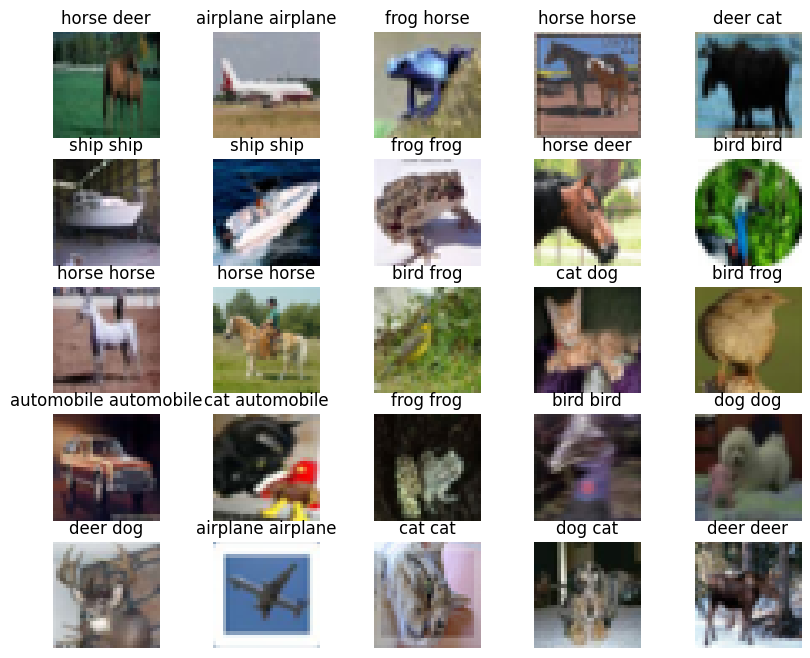

In [55]:
figure=plt.figure(figsize=(10,8))
cols,rows=5,5
for i in range(1,cols*rows+1):
    sample_idx=np.random.randint(len(x_test),size=(1,)).item()
    figure.add_subplot(rows,cols,i)
    img=x_test[sample_idx]
    plt.title(labels[np.argmax(y_test[sample_idx])]+" "+labels[y_pred[sample_idx]])
    plt.axis("off")
    plt.imshow(img)
plt.show()